In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate 40 records (Simulating a dataset for Heart Disease Prediction)
# Features: Age, Blood Pressure, Cholesterol, Max Heart Rate
# Target: Has Disease (1) or No Disease (0)

data = {
    'Age': np.random.randint(25, 80, 40),
    'Blood_Pressure': np.random.randint(90, 180, 40),
    'Cholesterol': np.random.randint(150, 300, 40),
    'Max_Heart_Rate': np.random.randint(60, 200, 40)
}

df = pd.DataFrame(data)



In [ ]:
# Create a complex logic for the target to make the neural network work for it
# If Age > 50 AND Cholesterol > 240, high chance of disease
# Added some noise so it's not a perfect rule (real world data is messy)
conditions = (
    (df['Age'] > 50) & 
    (df['Cholesterol'] > 220) | 
    (df['Blood_Pressure'] > 140)
)
df['Target'] = np.where(conditions, 1, 0)

In [ ]:


# Flip some labels to simulate noise/errors in data collection
flip_indices = np.random.choice(df.index, size=4, replace=False)
df.loc[flip_indices, 'Target'] = 1 - df.loc[flip_indices, 'Target']


In [ ]:

# Save to CSV
df.to_csv('medical_data_40.csv', index=False)
print("Data saved to 'medical_data_40.csv'")
print(df.head())

Data saved to 'medical_data_40.csv'
   Age  Blood_Pressure  Cholesterol  Max_Heart_Rate  Target
0   63             144          163             190       1
1   76             153          244              60       1
2   53              92          197              64       0
3   39             140          164             162       1
4   67              96          189              86       0


## Objective: Show Real Understanding of Deep Learning Math by Implementing a Perceptron from Scratch with NumPy, Then Expanding to a Full Neural Network


--- Training Custom Perceptron ---
Perceptron Accuracy: 0.5
Weights learned: [ 0.00039012  0.0235962   0.00537742 -0.03354274]
Bias learned: 0.009999999999999997


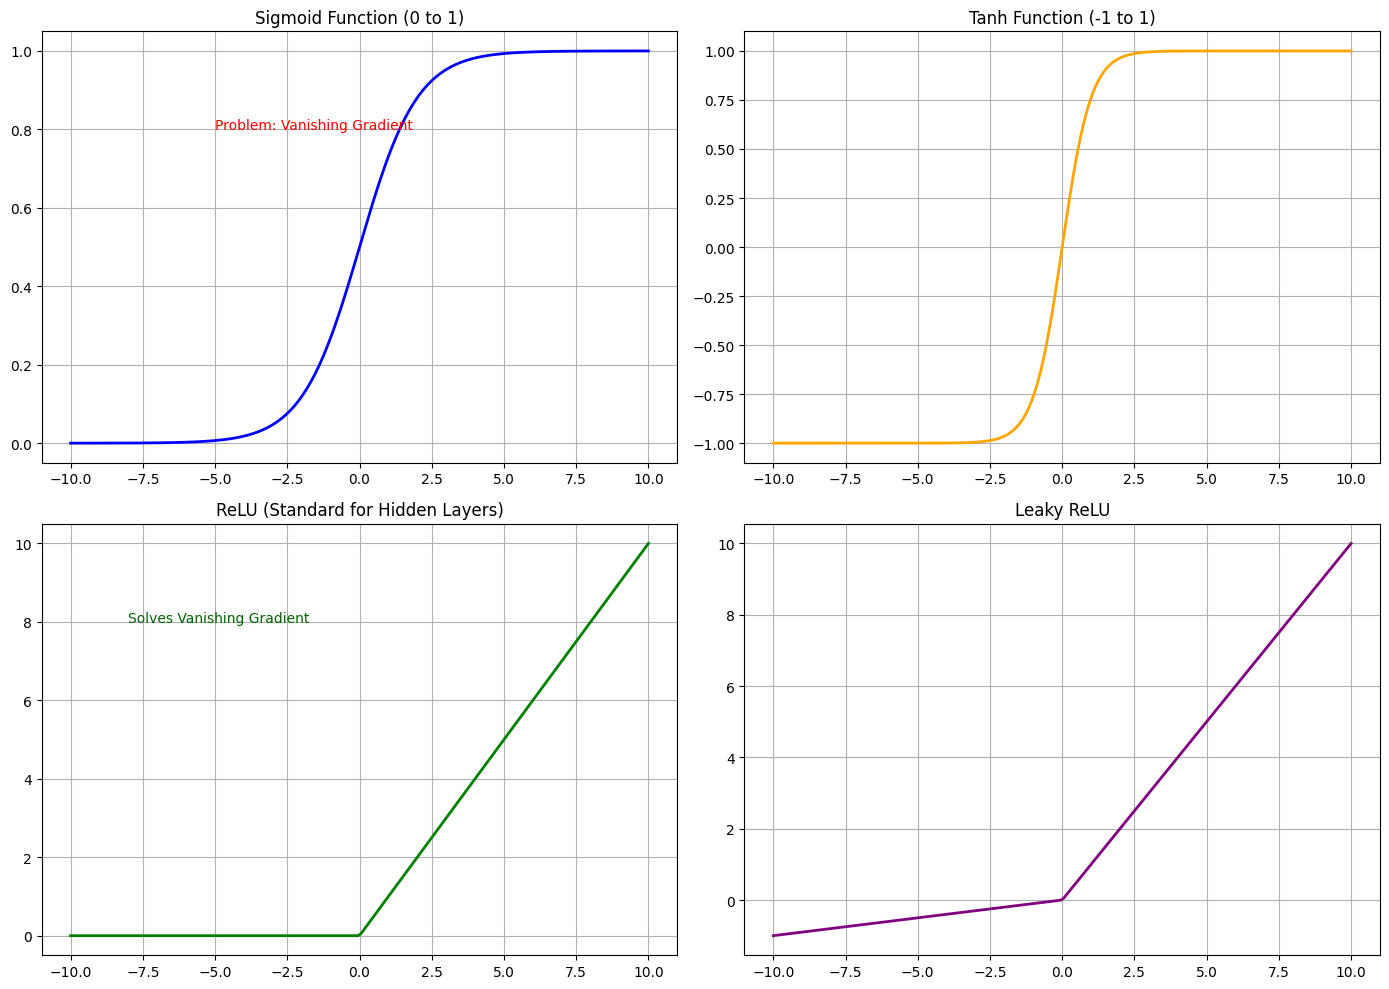

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#perceptron from scratch
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Linear output: f(x) = wx + b
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron Update Rule
                # Weight = Weight + lr * (actual - predicted) * input
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

# Testing the Perceptron on the generated CSV
df = pd.read_csv('medical_data_40.csv')
X = df.drop('Target', axis=1).values
y = df['Target'].values

# Standardize features (Important for gradient-based learning)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("--- Training Custom Perceptron ---")
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Weights learned:", p.weights)
print("Bias learned:", p.bias)

# Visualizing Activation Functions

# generate range
x_range = np.linspace(-10, 10, 200)

def sigmoid(x): return 1 / (1 + np.exp(-x))
def relu(x): return np.maximum(0, x)
def tanh(x): return np.tanh(x)
def leaky_relu(x, alpha=0.1): return np.where(x > 0, x, x * alpha)

plt.figure(figsize=(14, 10))

#Sigmoid
plt.subplot(2, 2, 1)
plt.plot(x_range, sigmoid(x_range), color='blue', linewidth=2)
plt.title("Sigmoid Function (0 to 1)")
plt.grid(True)
plt.text(-5, 0.8, "Problem: Vanishing Gradient", fontsize=10, color='red')

#Tanh
plt.subplot(2, 2, 2)
plt.plot(x_range, tanh(x_range), color='orange', linewidth=2)
plt.title("Tanh Function (-1 to 1)")
plt.grid(True)

#ReLU
plt.subplot(2, 2, 3)
plt.plot(x_range, relu(x_range), color='green', linewidth=2)
plt.title("ReLU (Standard for Hidden Layers)")
plt.grid(True)
plt.text(-8, 8, "Solves Vanishing Gradient", fontsize=10, color='darkgreen')

#Leaky ReLU
plt.subplot(2, 2, 4)
plt.plot(x_range, leaky_relu(x_range), color='purple', linewidth=2)
plt.title("Leaky ReLU")
plt.grid(True)

plt.tight_layout()
plt.show()